### 1. 코너(corner)검출
- 코너 : 이미지에서 뾰족하게 튀어나온 부분
- 코너는 이미지에서 고유한 특징을 가지고 있어서 이미지를 잘 분류할 수 있게하는 좋은 특징이다.
- 코너 검출 알고리즘
  - Harris 방법
  - Shi-Tomasi 방법
  - FAST (Features from Accelerated Segment Test)
  - SIFT (Scale Invariant Feature Transform)
  - SURF (Speeded Up Robust Features)
  - BRIEF (Binary Robust Independent Elementary Features)
  - BRISK (Binary Robust Invariant Scalable Keypoints)
  - ORB (Oriented FAST and Rotated BRIEF)
  - KAZE
  - AKAZE (Accelerated-KAZE)

#### 1.1 Shi-Tomasi방법(GFTT)
- Harris 방법을 개선한 것
- cv2.goodFeaturesToTrack(이미지, 코너 검출 갯수, 문턱값, 코너간 최소거리)

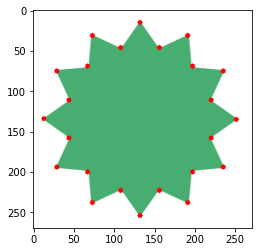

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/corner.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(img_gray, 25, 0.01, 20)  # 꼭지점 지정
corners = np.int0(corners)  # 좌표찾음

for i in corners:
    x, y = i.ravel()  # 다차원 배열을 1차원으로 변환
    cv2.circle(img, (x,y), 3, (255,0,0), -1)

plt.imshow(img)
plt.show()

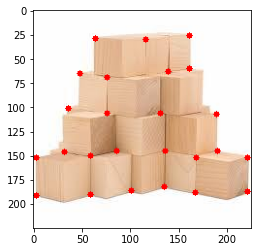

In [12]:
img = cv2.imread('./images/corner2.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

corners = cv2.goodFeaturesToTrack(img_gray, 25, 0.01, 20)  # 꼭지점 지정
corners = np.int0(corners)  # 좌표찾음

for i in corners:
    x, y = i.ravel()  # 다차원 배열을 1차원으로 변환
    cv2.circle(img, (x,y), 3, (255,0,0), -1)

plt.imshow(img)
plt.show()

#### 1.2 FAST
- 특정 픽셀 주변 16개 픽셀 값들을 조사해서 그 픽셀값이 가운데 픽셀보다 충분히 어둡거나 밝은 픽셀이 9개 이상 나타나면 코너라고 판단(픽셀의 값으로 코너를 검출하는 방법)

- cv2.FastFeatureDetector_create(threshold)
    - threshold : 중심 픽셀값과 주변 픽셀 값과의 차이, 기본값은 10, 30~60 적절

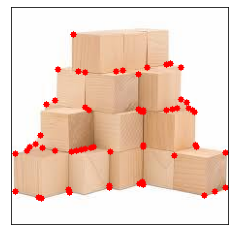

In [14]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("images/corner2.jpg")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fast = cv2.FastFeatureDetector_create(threshold=30)
keypoints = fast.detect(img)
img2 = cv2.drawKeypoints(img, keypoints, None,
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
for i in keypoints:
    pt = (int(i.pt[0]), int(i.pt[1]))
    cv2.circle(img, pt, 3, (255, 0, 0), -1)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

#### 1.3 SIFT
- Harris, GFTT, FAST 방법은 이동, 회전 변화에 강인하지만 크기 변환에 취약
  - 확대된 영상에서 작은 사각형으로 코너를 찾으려하면 기존의 코너가 에지처럼 보임
  - 따라서, 코너를 찾을 때 다양항 크기도 고려를 해서 코너 형태를 찾는 것이 고유한 특징을 찾는데에 적합
- SIFT (Scale Invariant Feature Transform) : 이미지의 크기 및 회전에 영향을 받지 않고 특징점을 추출하는 알고리즘
- 코너만으로 특징화하기는 충분하지 않음
- 코너는 크기변환, 회전, 밝기 변화 등에 따라 변화될 수 있음

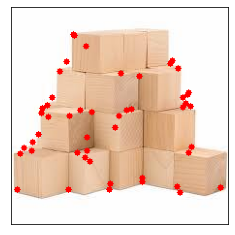

In [16]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("images/corner2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
detector = cv2.SIFT_create()
keypoints, descriptors = detector.detectAndCompute(gray_img, None)
for i in keypoints:
    pt = (int(i.pt[0]), int(i.pt[1]))
    cv2.circle(img, pt, 3, (255, 0, 0), -1)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()